# Определение перспективного тарифа для телеком компании.

# Determination of a prospective tariff for a telecom company.

## Оглавление.

## Table of contents.

- [Шаг 1. О проекте.](#Step_1)
- [Шаг 2. Загрузка библиотек и изучение данных.](#Step_2)
- [Шаг 3. Предобработка данных.](#Step_3)<br />
- [Шаг 4. Группировка и объединение данных.](#Step_4)
- [Шаг 5. Рассчет дополнительных показателей.](#Step_5) 
- [Шаг 6. Анализ поведения клиентов.](#Step_6)<br />
[Пункт A. Количество используемых минут.](#Step_7) <br />
[Пункт B. Объем потребляемого трафика.](#Step_8) <br />
[Пункт C. Количество использованных сообщений.](#Step_9) <br />
[Пункт D. Изучение переплаты.](#Step_10) <br />
[Пункт E. Структура доходов.](#Step_11) <br />
[Пункт F. Динамика выручки.](#Step_12) <br />
[Пункт G. Отключившиеся абоненты.](#Step_13) <br />
- [Шаг 7. Статистическое исследование.](#Step_14) <br />
[Пункт A. Равнество средних доходов тарифов.](#Step_15) <br />
[Пункт B. Равенство средних доходов от тарифов в Москве и регионах.](#Step_16) <br />
- [Шаг 8. Вывод.](#Step_17)

- [Step 1. About the project.](#Step_1)
- [Step 2. Download libraries and explore data.](#Step_2)
- [Step 3. Data preprocessing.](#Step_3)<br />
- [Step 4. Grouping and merging data.](#Step_4)
- [Step 5. Calculation of additional indicators.](#Step_5)
- [Step 6. Analyze customer behavior.](#Step_6)<br />
[Point A. Number of minutes used.](#Step_7) <br />
[Point B. Amount of traffic consumed.](#Step_8) <br />
[Point C. Number of messages used.](#Step_9) <br />
[Point D. Examining overpayment.](#Step_10) <br />
[Point E. Income structure.](#Step_11) <br />
[Point F. Revenue dynamics.](#Step_12) <br />
[Point G. Disconnected subscribers.](#Step_13) <br />
- [Step 7. Statistical study.](#Step_14) <br />
[Point A. Equality of average income tariffs.](#Step_15) <br />
[Point B. Equality of average revenues from tariffs in Moscow and the regions.](#Step_16) <br />
- [Step 8. Output.](#Step_17)

<a id='Step_1'></a>
## 1. О проекте.

## 1. About the project.

### Задача.
### The task.

На основе данных за 2018 год о пятиста пользователях сделать вывод: какой тариф лучше с точки зрения коммерческого департамента. Коммерческий департамент собирается пересмотреть рекламный бюджет и для этого ему необходимо понять какой тариф приносит больше денег.

Based on data for 2018 on five hundred users, draw a conclusion: which tariff is better from the point of view of the commercial department. The commercial department is going to revise the advertising budget and for this it needs to understand which tariff brings in more money.

### Описание данных. 

### Description of the data.

Нам было дано пять файлов:
- calls
- internet
- messages
- users
- tariffs

We were given five files:
- calls
- internet
-messages
- users
- tariffs

Первые четыре файла мы объеденили в один DataFrame, рассчитав месячные показатели для каждого пользователя. В итоге у нас получилось два DataFrame: df (сведения о пользователях), tariffs (сведения о тарифах).
Переменные df:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана
- month - месяц наблюдения
- total_internet - потрачено трафика за месяц
- total_duration - потрачено минут за месяц
- total_calls - совершенно звонков за месяц
- mean_duration - средняя продолжительность разговора в месяц за месяц
- total_messages - потрачено сообщений за месяц
- overpay_call - рубллей переплачено за звоки а месяц
- overpay_messages - рубллей переплачено за сообщения а месяц
- overpay_internet - рубллей переплачено за трафик а месяц
- total_fee - рублей потрачено за звоки а месяц

We combined the first four files into one DataFrame, calculating monthly indicators for each user. As a result, we got two DataFrames: df (user information), tariffs (tariff information).
df variables:
- user_id - unique user ID
- first_name - username
- last_name - last name of the user
- age — user's age (years)
- reg_date — tariff activation date (day, month, year)
- churn_date — date of termination of the tariff use (if the value is omitted, then the tariff was still valid at the time of data upload)
- city — user's city of residence
- tariff — tariff plan name
- month - observation month
- total_internet - traffic spent per month
- total_duration - spent minutes per month
- total_calls - total calls per month
- mean_duration - average call duration per month per month
- total_messages - messages spent per month
- overpay_call - rubles overpaid for calls per month
- overpay_messages - rubles overpaid for messages a month
- overpay_internet - rubles overpaid for monthly traffic
- total_fee - rubles spent for calls per month

Переменные tariffs:
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Variable tariffs:
- tariff_name — tariff name
- rub_monthly_fee — monthly subscription fee in rubles
- minutes_included - the number of minutes of conversation per month included in the subscription fee
- messages_included - number of messages per month included in the subscription fee
- mb_per_month_included - the amount of Internet traffic included in the subscription fee (in megabytes)
- rub_per_minute - the cost of a minute of conversation in excess of the tariff package (for example, if the tariff includes 100 minutes of conversation per month, then a fee will be charged from 101 minutes)
- rub_per_message - the cost of sending a message in excess of the tariff package
- rub_per_gb - the cost of an additional gigabyte of Internet traffic in excess of the tariff package (1 gigabyte = 1024 megabytes)

<a id='Step_2'></a>
## 2. Загрузка библиотек и изучение данных.

## 2. Loading libraries and exploring the data.

Загружаем данные и библиотеки.

Loading data and libraries.

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import warnings
import matplotlib as plt
%matplotlib inline
warnings.filterwarnings('ignore')
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Посмотрим на данные.

Let's look at the data.

In [2]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
print('Минимальная длительность звонка', calls['duration'].min())
print('Максимальная длительность звонка', calls['duration'].max())

Минимальная длительность звонка 0.0
Максимальная длительность звонка 38.0


Minimum call duration 0.0

Maximum call duration 38.0

In [4]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
print('Минимальный объем потраченного трафика в течении сессии', internet['mb_used'].min())
print('Максимальный объем потраченного трафика в течении сессии', internet['mb_used'].max())

Минимальный объем потраченного трафика в течении сессии 0.0
Максимальный объем потраченного трафика в течении сессии 1724.83


The minimum amount of traffic spent during the session 0.0

The maximum amount of traffic spent during the session 1724.83

In [6]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### <div class="alert alert-info">Вывод:</div>
- файлы разноразмерные; содержат информацию по каждому дейсвтию абонента (звонок, собщение, выход в интернет)
- тарифы писанны отдельно в файле tariffs
- есть пустые значения в churn_date
- есть нулевые значения duration в файле calls
- есть нулевые значения duration в файле internet

### Conclusion:
- files of various sizes; contain information on each action of the subscriber (call, message, access to the Internet)
- tariffs are written separately in the tariffs file
- there are empty values in churn_date
- there are zero duration values in the calls file
- there are zero duration values in the internet file

<a id='Step_3'></a>
## 3. Предобработка данных.

## 3. Data preprocessing.

1. Users содержит пустые значения в churn_date. Оставим как есть, так как Nan в этом случае значит, что пользователи все еще пользуются тарифом.
2. Calls содержит нули в duration. Такие значения нужно заменить на Nan, чтобы не искажать средние. Ноль означает, что разговор не состоялся.
3. Internet тоже содержит нули. Также заменинм на Nan.
4. Даты необходимо привести к нужному формату.
5. Минуты и трафик оркугляем вверх (по заданию).

1. Users contains empty values in churn_date. Let's leave it as it is, since Nan in this case means that users are still using the tariff.
2. Calls contains zeros in duration. Such values should be replaced with Nan so as not to distort the averages. Zero means that the conversation did not take place.
3. The Internet also contains zeros. Also change to Nan.
4. Dates must be converted to the correct format.
5. Minutes and traffic are rounded up (by task).

Нулевой трафик тоже решил заменить на Nan.

I also decided to replace zero traffic with Nan.

In [13]:
# Устноавим правильный формат для даты.
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
# Округляем вверх нули и трафик.
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))
internet['mb_used'] = internet['mb_used'].apply(lambda x: math.ceil(x))
# Заменим нули в duration и mb_used на NaN.
calls['duration'].replace(0.00, np.NaN, inplace=True)
internet['mb_used'].replace(0.00, np.NaN, inplace=True)

Данные содержат сведенья о клиентах за несколько месяцев. Будем группировать по id клинета и по месяцам. Для этого извличем месяц из даты.

The data contains customer details for several months. We will group by client id and by month. To do this, we extract the month from the date.

In [14]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

Перейдем непосредственно к группировке.

Let's move on to grouping.

<a id='Step_4'></a>
## 4. Группировка и объединение данных.

## 4. Grouping and combining data.

#### Идея заключается в рассчете показателей затраченных минут, сообщений и трафика для каждого пользователя по всем месяцам.

#### The idea is to calculate the spent minutes, messages and traffic for each user for all months.

Рассчитаем показатели для звонков.

Let's calculate the indicators for calls.

In [15]:
pivot_calls = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count', 'mean'])
pivot_calls.reset_index(inplace=True)
pivot_calls.columns = pivot_calls.columns.droplevel(1)
pivot_calls.rename(columns={'sum':'total_duration', 'count': 'total_calls', 'mean': 'mean_duration'}, inplace=True)
pivot_calls

,user_id,month,total_duration,total_calls,mean_duration
0,1000,5,159.0,17,9.352941
1,1000,6,172.0,28,6.142857
2,1000,7,340.0,41,8.292683
3,1000,8,408.0,42,9.714286
4,1000,9,466.0,46,10.130435
...,...,...,...,...,...
3169,1498,10,247.0,30,8.233333
3170,1499,9,70.0,8,8.750000
3171,1499,10,449.0,44,10.204545
3172,1499,11,612.0,62,9.870968


Рассчитаем показатели для трафика.

Calculate traffic metrics.

In [16]:
pivot_internet = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
pivot_internet.reset_index(inplace=True)
pivot_internet.columns = pivot_internet.columns.droplevel(1)
pivot_internet.rename(columns={'sum': 'total_internet'}, inplace=True)
pivot_internet

,user_id,month,total_internet
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3198,1498,10,20604.0
3199,1499,9,1848.0
3200,1499,10,17809.0
3201,1499,11,17984.0


Рассчитаем показатели для сообщений.

Calculate indicators for messages.

In [17]:
pivot_messages = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
pivot_messages.reset_index(inplace=True)
pivot_messages.columns = pivot_messages.columns.droplevel(1)
pivot_messages.rename(columns={'count': 'total_messages'}, inplace=True)
pivot_messages

,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Теперь объединим по user id и по month все таблицы pivot.

Now let's combine by user id and by month all the pivot tables.

In [18]:
df = users.merge(pivot_internet, on='user_id')
df = df.merge(pivot_calls, on=['user_id', 'month'], how='left')
df = df.merge(pivot_messages, on=['user_id', 'month'], how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 14 columns):
user_id           3203 non-null int64
age               3203 non-null int64
churn_date        186 non-null datetime64[ns]
city              3203 non-null object
first_name        3203 non-null object
last_name         3203 non-null object
reg_date          3203 non-null datetime64[ns]
tariff            3203 non-null object
month             3203 non-null int64
total_internet    3203 non-null float64
total_duration    3163 non-null float64
total_calls       3163 non-null float64
mean_duration     3157 non-null float64
total_messages    2706 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 375.4+ KB


Видим, что у нас получились пустые значения. Это связано с тем, что количество строк таблиц pivot отличается. Это нам никак не мешает - оставим как есть.
Так же удалим из таблицы столбы first_name и last_name (у нас есть user_id, так что эта информация будет лишней). 

We see that we got empty values. This is because the number of rows of the pivot tables is different. This does not bother us in any way - we will leave it as it is.
We will also remove the first_name and last_name columns from the table (we have a user_id, so this information will be superfluous).

In [20]:
# Заполним пропуски нулям.
df['total_duration'].fillna(0, inplace=True)
df['total_calls'].fillna(0, inplace=True)
df['mean_duration'].fillna(0, inplace=True)
df['total_messages'].fillna(0, inplace=True)
# Исправим форматы.
df['total_duration'] = df['total_duration'].astype('int64')  
df['total_calls'] = df['total_calls'].astype('int64')  
df['total_internet'] = df['total_internet'].astype('int64')  
df['total_messages'] = df['total_messages'].astype('int64')  

In [21]:
df.drop(['first_name', 'last_name'], axis=1, inplace=True)
df.head()

,user_id,age,churn_date,city,reg_date,tariff,month,total_internet,total_duration,total_calls,mean_duration,total_messages
0,1000,52,NaT,Краснодар,2018-05-25,ultra,5,2256,159,17,9.352941,22
1,1000,52,NaT,Краснодар,2018-05-25,ultra,6,23257,172,28,6.142857,60
2,1000,52,NaT,Краснодар,2018-05-25,ultra,7,14016,340,41,8.292683,75
3,1000,52,NaT,Краснодар,2018-05-25,ultra,8,14070,408,42,9.714286,81
4,1000,52,NaT,Краснодар,2018-05-25,ultra,9,14581,466,46,10.130435,57


### <div class="alert alert-info">Вывод:</div>
- Мы полчили объединенный файл, которые содержит информацию о звонках, сообщениях и трафике абонентов по каждому месяцу.
- Обработали пропуски и приобразовали переменные к нужным форматам.

### <div class="alert alert-info">Output:</div>
- We have received a combined file that contains information about calls, messages and traffic of subscribers for each month.
- Processed gaps and converted variables to the required formats.

<a id='Step 5'></a> ## 5. Расчет дополнительных показателей.

<a id='Step 5'></a> ## 5. Calculation of additional indicators.

Поделим таблицу на две выборки по тарифам.

Let's divide the table into two samples by tariffs.

In [22]:
df_smart = df.query('tariff == "smart"')
df_ultra = df.query('tariff == "ultra"')

Рассчитаем для каждого клинета переплату за минуты, трафик и смс, а также всё потраченную за месяц сумму.

We calculate for each client the overpayment for minutes, traffic and SMS, as well as the entire amount spent per month.

In [23]:
df_smart['over_pay_calls'] = df_smart['total_duration'].apply(lambda x: (tariffs['minutes_included'][0] - x) 
                                                          * -tariffs['rub_per_minute'][0]
                                                         if (tariffs['minutes_included'][0] - x) < 0 else 0)
df_smart['over_pay_internet'] = df_smart['total_internet'].apply(lambda x: (math.ceil((tariffs['mb_per_month_included'][0] - x) 
                                                                                  / 1024)) * -tariffs['rub_per_gb'][0]
                                                         if (tariffs['mb_per_month_included'][0] - x) < 0 else 0)
df_smart['over_pay_messages'] = df_smart['total_messages'].apply(lambda x: (tariffs['messages_included'][0] - x) 
                                                             * -tariffs['rub_per_message'][0]
                                                         if (tariffs['messages_included'][0] - x) < 0 else 0)
df_smart['total_fee'] = (tariffs['rub_monthly_fee'][0] + df_smart['over_pay_calls'] + df_smart['over_pay_internet'] +
                                                                                    df_smart['over_pay_messages'])
df_smart.head()

,user_id,age,churn_date,city,reg_date,tariff,month,total_internet,total_duration,total_calls,mean_duration,total_messages,over_pay_calls,over_pay_internet,over_pay_messages,total_fee
8,1001,41,NaT,Москва,2018-11-01,smart,11,18452,430,45,9.555556,0,0,600,0,1150
9,1001,41,NaT,Москва,2018-11-01,smart,12,14053,414,47,8.808511,0,0,0,0,550
10,1002,59,NaT,Стерлитамак,2018-06-17,smart,6,10871,117,14,8.357143,4,0,0,0,550
11,1002,59,NaT,Стерлитамак,2018-06-17,smart,7,17601,214,21,10.190476,11,0,400,0,950
12,1002,59,NaT,Стерлитамак,2018-06-17,smart,8,20347,289,37,7.810811,13,0,800,0,1350


In [24]:
df_ultra['over_pay_calls'] = df_ultra['total_duration'].apply(lambda x: (tariffs['minutes_included'][1] - x) 
                                                          * -tariffs['rub_per_minute'][1]
                                                         if (tariffs['minutes_included'][1] - x) < 0 else 0)
df_ultra['over_pay_internet'] = df_ultra['total_internet'].apply(lambda x: (math.ceil((tariffs['mb_per_month_included'][1] - x) 
                                                                                  / 1024)) * -tariffs['rub_per_gb'][1]
                                                         if (tariffs['mb_per_month_included'][1] - x) < 0 else 0)
df_ultra['over_pay_messages'] = df_ultra['total_messages'].apply(lambda x: (tariffs['messages_included'][1] - x) 
                                                             * -tariffs['rub_per_message'][1]
                                                         if (tariffs['messages_included'][1] - x) < 0 else 0)
df_ultra['total_fee'] = (tariffs['rub_monthly_fee'][1] + df_ultra['over_pay_calls'] + df_ultra['over_pay_internet'] +
                                                                                    df_ultra['over_pay_messages'])
df_ultra.head()

,user_id,age,churn_date,city,reg_date,tariff,month,total_internet,total_duration,total_calls,mean_duration,total_messages,over_pay_calls,over_pay_internet,over_pay_messages,total_fee
0,1000,52,NaT,Краснодар,2018-05-25,ultra,5,2256,159,17,9.352941,22,0,0,0,1950
1,1000,52,NaT,Краснодар,2018-05-25,ultra,6,23257,172,28,6.142857,60,0,0,0,1950
2,1000,52,NaT,Краснодар,2018-05-25,ultra,7,14016,340,41,8.292683,75,0,0,0,1950
3,1000,52,NaT,Краснодар,2018-05-25,ultra,8,14070,408,42,9.714286,81,0,0,0,1950
4,1000,52,NaT,Краснодар,2018-05-25,ultra,9,14581,466,46,10.130435,57,0,0,0,1950


### <div class="alert alert-info">Вывод:</div> 
- На этом шаге мы разделили выборку на две части по тарифам. 
- Рассчитали затраты абонентов на пользование тарифами, суммарно и раздельно (связь, трафик, сообщения).

### <div class="alert alert-info">Output:</div>
- At this step, we divided the sample into two parts by tariffs.
- Calculated the costs of subscribers for the use of tariffs, in total and separately (communication, traffic, messages).

<a id='Step_6'></a>
## <div class="alert alert-info">6. Анализ поведения клиентов.</div>

<a id='Step_6'></a>
## <div class="alert alert-info">6. Analysis of customer behavior.</div>

<a id='Step_7'></a>
#### Пункт A.

#### Point A.

Изучим продолжительность разговора.

Let's study the duration of the conversation.

In [25]:
print('Средняя продолжительность разговора на тарифе smart:', df_smart['total_duration'].mean())
print('Медианная продолжительность разговора на тарифе smart:', df_smart['total_duration'].median())
print('Средняя продолжительность разговора на тарифе ultra:', df_ultra['total_duration'].mean())
print('Медианная продолжительность разговора на тарифе ultra:', df_ultra['total_duration'].median())
print('Стандартная ошибка продолжительности разговора на тарифе smart:', np.std(df_smart['total_duration'], ddof=1))
print('Выборочная дисперсия продолжительности разговора на тарифе smart:', np.var(df_smart['total_duration'], ddof=1))
print('Стандартная ошибка продолжительности разговора на тарифе ultra:', np.std(df_ultra['total_duration'], ddof=1))
print('Выборочная дисперсия продолжительности разговора на тарифе ultra:', np.var(df_ultra['total_duration'], ddof=1))


Средняя продолжительность разговора на тарифе smart: 418.1000897666068
Медианная продолжительность разговора на тарифе smart: 422.0
Средняя продолжительность разговора на тарифе ultra: 529.7497435897436
Медианная продолжительность разговора на тарифе ultra: 520.0
Стандартная ошибка продолжительности разговора на тарифе smart: 190.19664472359673
Выборочная дисперсия продолжительности разговора на тарифе smart: 36174.76366411408
Стандартная ошибка продолжительности разговора на тарифе ultra: 317.62213117306516
Выборочная дисперсия продолжительности разговора на тарифе ultra: 100883.81821091981


Average call duration on the smart tariff: 418.1000897666068

Median call duration on the smart tariff: 422.0

Average call duration on ultra tariff: 529.7497435897436

Median call duration on the ultra tariff: 520.0

Standard error of call duration on smart tariff: 190.19664472359673

Selective variance of call duration at the smart tariff: 36174.76366411408

Standard error of call duration on ultra tariff: 317.62213117306516

Sample variance of call duration at ultra tariff: 100883.81821091981

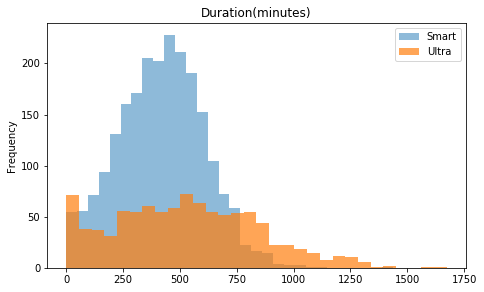

In [26]:
df_smart['total_duration'].plot(kind='hist', bins=30, alpha = 0.5, legend=True, 
                                title='Duration(minutes)', figsize=(7.5, 4.5), label='Smart')
df_ultra['total_duration'].plot(kind='hist', bins=30, alpha = 0.7, legend=True, label='Ultra')

Text(0.5, 0.98, 'Duration (minutes)')

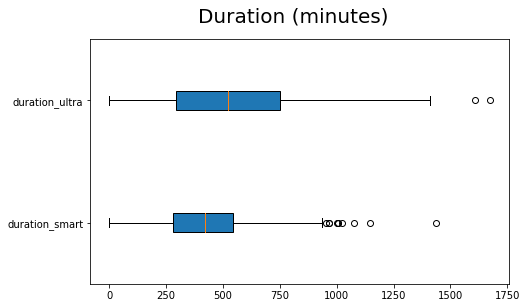

In [27]:
plt.pyplot.boxplot((df_smart['total_duration'],df_ultra['total_duration']), labels=('duration_smart', 'duration_ultra'), 
                   vert=False, patch_artist=True)
fig = plt.pyplot.gcf()
fig.set_size_inches(7.5, 4.5)
fig.suptitle('Duration (minutes)', fontsize=20)

Видим, что есть выюросы и знаем, что есть абоненты, которые не пользовались связью хотя бы один месяц. Посомтрим на время разговора без нулевых значений и без выбросов. Выбросами будем считать: 940 минут для Smart и 1450 минут для Ultra.

We see that there are vyyuros and we know that there are subscribers who have not used communication for at least one month. Let's look at the time of the conversation without zero values and without outliers. We will consider emissions: 940 minutes for Smart and 1450 minutes for Ultra.

In [28]:
print('Средняя продолжительность разговора на тарифе smart:', (df_smart.query('total_duration > 0 and total_duration < 940')
                                                               ['total_duration'].mean()))
print('Медианная продолжительность разговора на тарифе smart:', (df_smart.query('total_duration > 0 and total_duration < 940')
                                                                 ['total_duration'].median()))
print('Средняя продолжительность разговора на тарифе ultra:', (df_ultra.query('total_duration > 0 and total_duration < 1450')
                                                                 ['total_duration'].mean()))
print('Медианная продолжительность разговора на тарифе ultra:', (df_ultra.query('total_duration > 0 and total_duration < 1450')
                                                                 ['total_duration'].median()))
print('Стандартная ошибка продолжительности разговора на тарифе smart:', (np.std
(df_smart.query('total_duration > 0 and total_duration < 940')['total_duration'], ddof=1)))
print('Выборочная дисперсия продолжительности разговора на тарифе smart:', (np.var
(df_smart.query('total_duration > 0 and total_duration < 940')['total_duration'], ddof=1)))
print('Стандартная ошибка продолжительности разговора на тарифе ultra:', (np.std
(df_ultra.query('total_duration > 0 and total_duration < 1450')['total_duration'], ddof=1)))
print('Выборочная дисперсия продолжительности разговора на тарифе ultra:', (np.var
(df_ultra.query('total_duration > 0 and total_duration < 1450')['total_duration'], ddof=1)))

Средняя продолжительность разговора на тарифе smart: 416.72262443438916
Медианная продолжительность разговора на тарифе smart: 421.5
Средняя продолжительность разговора на тарифе ultra: 548.9026737967914
Медианная продолжительность разговора на тарифе ultra: 533.0
Стандартная ошибка продолжительности разговора на тарифе smart: 184.12367043849605
Выборочная дисперсия продолжительности разговора на тарифе smart: 33901.526015743904
Стандартная ошибка продолжительности разговора на тарифе ultra: 301.28547601061297
Выборочная дисперсия продолжительности разговора на тарифе ultra: 90772.93805494164


Average call duration on the smart tariff: 416.72262443438916

Median call duration on the smart tariff: 421.5

Average call duration on ultra tariff: 548.9026737967914

Median call duration on the ultra tariff: 533.0

Standard error of call duration on smart tariff: 184.12367043849605

Selective variance of call duration at the smart tariff: 33901.526015743904

Call duration standard error on ultra tariff: 301.28547601061297

Sample variance of call duration at ultra tariff: 90772.93805494164

In [29]:
print('{: .2%},пользователей Ultra разговаривали менее пакета Smart'.format(len(df_ultra[df_ultra['total_duration'] 
                                  < tariffs['minutes_included'][0]]['user_id'].unique()) / len(df_ultra['user_id'].unique())))

 82.99%,пользователей Ultra разговаривали менее пакета Smart


82.99% of Ultra users talked less than Smart

In [30]:
print('{: .2%} пользователей Smart превысили объем пакета минут'.format(len(df_smart[df_smart['over_pay_calls'] > 0]
                                                                  ['user_id'].unique()) / len(df_smart['user_id'].unique())))

 60.86% пользователей Smart превысили объем пакета минут


60.86% of Smart users have exceeded the package minutes

- В среднем абоненты Smart разговривают 417 минут ,а абоненты Ultra - 549 минут.
- Получили большие значения стандартных ошибок в Ultra. 
- Месячные суммы продолжительности разговоров на тарифе Ultra не образуют нормального распределения. 
- Это говорит о неоднордном поведении абонентов на этом тарифе. 
- Гистограмма продолжительности разговоров Smart имеет отрицательную скошенность, это подтверждает и боксплот.
- Необходимо отметить, что тариф Ultra включает в себя 3000 минут разговора в месяц, но никто из абонентов (в этой выборке) столько не разговаоривал. Более того, значительная часть абонентов обошлась бы количеством минут Smart.
- 61% пользователей Smart превысили объем пакета минут.

- On average, Smart subscribers talk 417 minutes, and Ultra subscribers - 549 minutes.
- Got large standard errors in Ultra.
- Monthly amounts of call duration on the Ultra tariff do not form a normal distribution.
- This indicates the non-uniform behavior of subscribers at this tariff.
- The Smart call duration histogram has a negative skew, which is confirmed by the boxplot.
- It should be noted that the Ultra tariff includes 3,000 minutes of conversation per month, but none of the subscribers (in this sample) talked so much. Moreover, a significant part of subscribers would cost the number of Smart minutes.
- 61% of Smart users have exceeded the package of minutes.

<a id='Step_8'></a>
#### Пункт B.

#### Point B.

Изучим объем потребляемого трафика за месяц одним абонентом.

Let's study the amount of traffic consumed per month by one subscriber.

In [31]:
print('Средний объем потребляемого трафика на тарифе smart:', df_smart['total_internet'].mean())
print('Медианный объем потребляемого трафика на тарифе smart:', df_smart['total_internet'].median())
print('Средний объем потребляемого трафика на тарифе ultra:', df_ultra['total_internet'].mean())
print('Медианный объем потребляемого трафика на тарифе ultra:', df_ultra['total_internet'].median())
print('Стандартная ошибка объема потребляемого трафика на тарифе smart:', np.std(df_smart['total_internet'], ddof=1))
print('Выборочная дисперсия объема потребляемого трафика на тарифе smart:', np.var(df_smart['total_internet'], ddof=1))
print('Стандартная ошибка объема потребляемого трафика на тарифе ultra:', np.std(df_ultra['total_internet'], ddof=1))
print('Выборочная дисперсия объема потребляемого трафика на тарифе ultra:', np.var(df_ultra['total_internet'], ddof=1))

Средний объем потребляемого трафика на тарифе smart: 16236.47262118492
Медианный объем потребляемого трафика на тарифе smart: 16532.0
Средний объем потребляемого трафика на тарифе ultra: 19686.76717948718
Медианный объем потребляемого трафика на тарифе ultra: 19411.0
Стандартная ошибка объема потребляемого трафика на тарифе smart: 5868.824471845583
Выборочная дисперсия объема потребляемого трафика на тарифе smart: 34443100.68133359
Стандартная ошибка объема потребляемого трафика на тарифе ultra: 9952.057054094726
Выборочная дисперсия объема потребляемого трафика на тарифе ultra: 99043439.60795662


The average amount of traffic consumed on the smart tariff: 16236.47262118492

Median volume of consumed traffic on the smart tariff: 16532.0

The average amount of traffic consumed on the ultra tariff: 19686.76717948718

Median volume of consumed traffic on the ultra tariff: 19411.0

Standard error of the amount of traffic consumed on the smart tariff: 5868.824471845583

Selective variance of the volume of consumed traffic on the smart tariff: 34443100.68133359

Standard error of the amount of traffic consumed on the ultra tariff: 9952.057054094726

Sample variance of the amount of consumed traffic on the ultra tariff: 99043439.60795662

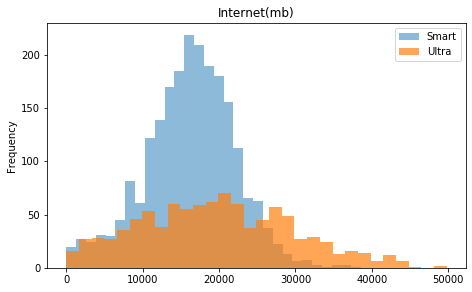

In [32]:
df_smart['total_internet'].plot(kind='hist', bins=30, alpha = 0.5, legend=True, 
                                title='Internet(mb)', figsize=(7.5, 4.5), label='Smart')
df_ultra['total_internet'].plot(kind='hist', bins=30, alpha = 0.7, legend=True, label='Ultra')

Text(0.5, 0.98, 'Internet (mb)')

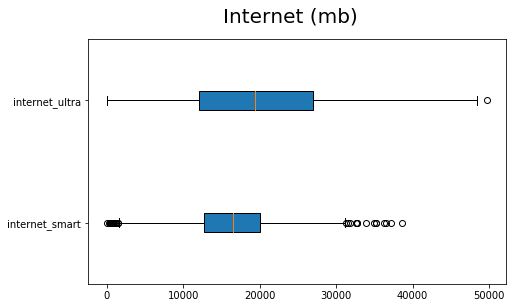

In [33]:
plt.pyplot.boxplot((df_smart['total_internet'],df_ultra['total_internet']), labels=('internet_smart', 'internet_ultra'), 
                   vert=False, patch_artist=True)
fig = plt.pyplot.gcf()
fig.set_size_inches(7.5, 4.5)
fig.suptitle('Internet (mb)', fontsize=20)

Будем считать в Smart выбросами значений трафика менее 1600 мб и более 31200 мб; для Ultra значения более 49800 и равные 0.

We will consider in Smart outliers traffic values less than 1600 mb and more than 31200 mb; for Ultra, values are greater than 49800 and equal to 0.

In [34]:
print('Средний объем потребляемого трафика на тарифе smart:', (df_smart.query
('total_internet < 31200 and total_internet > 1600')['total_internet'].mean()))
print('Медианный объем потребляемого трафика на тарифе smart:', (df_smart.query
('total_internet < 31200 and total_internet > 1600')['total_internet'].median()))
print('Средний объем потребляемого трафика на тарифе ultra:', (df_ultra.query
('total_internet < 49800 and total_internet > 0')['total_internet'].mean()))
print('Медианный объем потребляемого трафика на тарифе ultra:', (df_ultra.query
('total_internet < 49800 and total_internet > 0')['total_internet'].median()))
print('Стандартная ошибка объема потребляемого трафика на тарифе smart:', (np.std(df_smart.query
('total_internet < 31200 and total_internet > 1600')['total_internet'], ddof=1)))
print('Выборочная дисперсия объема потребляемого трафика на тарифе smart:', (np.var(df_smart.query
('total_internet < 31200 and total_internet > 1600')['total_internet'], ddof=1)))
print('Стандартная ошибка объема потребляемого трафика на тарифе ultra:', (np.std(df_ultra.query
('total_internet < 49800 and total_internet > 0')['total_internet'], ddof=1)))
print('Выборочная дисперсия объема потребляемого трафика на тарифе ultra:', (np.var(df_ultra.query
('total_internet < 49800 and total_internet > 0')['total_internet'], ddof=1)))

Средний объем потребляемого трафика на тарифе smart: 16276.736313868612
Медианный объем потребляемого трафика на тарифе smart: 16561.5
Средний объем потребляемого трафика на тарифе ultra: 19706.979466119097
Медианный объем потребляемого трафика на тарифе ultra: 19427.5
Стандартная ошибка объема потребляемого трафика на тарифе smart: 5519.381237999702
Выборочная дисперсия объема потребляемого трафика на тарифе smart: 30463569.25038312
Стандартная ошибка объема потребляемого трафика на тарифе ultra: 9937.127297804644
Выборочная дисперсия объема потребляемого трафика на тарифе ultra: 98746498.93277423


The average amount of traffic consumed on the smart tariff: 16276.736313868612

Median volume of consumed traffic on the smart tariff: 16561.5

The average amount of traffic consumed on the ultra tariff: 19706.979466119097

Median volume of consumed traffic on the ultra tariff: 19427.5

Standard error of the volume of consumed traffic on the smart tariff: 5519.381237999702

Selective variance of the amount of consumed traffic on the smart tariff: 30463569.25038312

Standard error of the amount of traffic consumed on the ultra tariff: 9937.127297804644

Sample variance of the amount of consumed traffic on the ultra tariff: 98746498.93277423

In [35]:
print('{: .2%} пользователей Smart превысили объем пакета трафика'.format(len(df_smart[df_smart['over_pay_internet'] > 0]
                                                             ['user_id'].unique()) / len(df_smart['user_id'].unique())))

 84.00% пользователей Smart превысили объем пакета трафика


84.00% of Smart users have exceeded the volume of the traffic package

In [36]:
print('{: .2%} пользователей Ultra превысили объем пакета трафика'.format(len(df_ultra[df_ultra['over_pay_internet'] > 0]
                                                                              ['user_id'].unique()) / len(df_ultra['user_id'].unique())))

 25.85% пользователей Ultra превысили объем пакета трафика


25.85% of Ultra users have exceeded their traffic package

- В среднем абоненты Smart потребляет 16277 мб трафика ,а абоненты Ultra - 19707 мб трафика.
- Получили большие значения стандартных ошибок объема трафика в Ultra. 
- Месячные суммы объема трафика на тарифе Ultra не образуют нормального распределения. 
- Это говорит о неоднордном поведении абонентов на этом тарифе. 
- Гистограмма объема трафика Smart имеет отрицательную скошенность.
- 29% абонентов Ultra и 84% абонентов Smart превысили пакет трафика. Похоже что тариф Ulra скорее используют из-за интрнета, чем из-за минут.

- On average, Smart subscribers consume 16277 MB of traffic, and Ultra subscribers - 19707 MB of traffic.
- Got high traffic volume standard errors in Ultra.
- The monthly amounts of traffic volume on the Ultra tariff do not form a normal distribution.
- This indicates the heterogeneous behavior of subscribers at this tariff.
- Smart traffic volume histogram is negatively skewed.
- 29% of Ultra subscribers and 84% of Smart subscribers exceeded the traffic package. It seems that the Ulra tariff is used more because of the Internet than because of the minutes.

<a id='Step_9'></a>
#### Point C.

Изучим и охарактеризуйте использование пакетов сообщений.

Let us study and characterize the use of message packets.

In [37]:
print('Среднее количество использованных сообщений на тарифе smart:', df_smart['total_messages'].mean())
print('Медианнее количествио использованных сообщений на тарифе smart:', df_smart['total_messages'].median())
print('Среднее количество использованных сообщений на тарифе ultra:', df_ultra['total_messages'].mean())
print('Медианнее количество использованных сообщений на тарифе ultra:', df_ultra['total_messages'].median())
print('Стандартная ошибка количества использованных сообщений на тарифе smart:', np.std(df_smart['total_messages'], ddof=1))
print('Выборочная дисперсия количества использованных сообщений на тарифе smart:', np.var(df_smart['total_messages'], ddof=1))
print('Стандартная ошибка количества использованных сообщений на тарифе ultra:', np.std(df_ultra['total_messages'], ddof=1))
print('Выборочная дисперсия количества использованных сообщений на тарифе ultra:', np.var(df_ultra['total_messages'], ddof=1))


Среднее количество использованных сообщений на тарифе smart: 33.398563734290846
Медианнее количествио использованных сообщений на тарифе smart: 28.0
Среднее количество использованных сообщений на тарифе ultra: 49.585641025641024
Медианнее количество использованных сообщений на тарифе ultra: 38.0
Стандартная ошибка количества использованных сообщений на тарифе smart: 28.22586809520413
Выборочная дисперсия количества использованных сообщений на тарифе smart: 796.6996297278624
Стандартная ошибка количества использованных сообщений на тарифе ultra: 47.97837679209317
Выборочная дисперсия количества использованных сообщений на тарифе ultra: 2301.9246396040644


Average number of used messages on the smart plan: 33.398563734290846

Median number of used messages on the smart plan: 28.0

Average number of used messages on the ultra plan: 49.585641025641024

Median number of messages used on the ultra plan: 38.0

Standard error of the number of used messages on the smart tariff: 28.22586809520413

Sample variance of the number of used messages on the smart tariff: 796.6996297278624

Standard error of the number of used messages on the ultra tariff: 47.97837679209317

Sample variance of the number of messages used on the ultra tariff: 2301.9246396040644

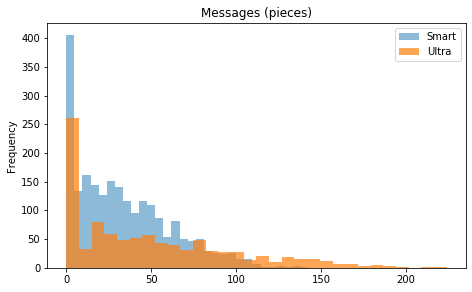

In [38]:
df_smart['total_messages'].plot(kind='hist', bins=30, alpha = 0.5, legend=True, 
                                title='Messages (pieces)', figsize=(7.5, 4.5), label='Smart')
df_ultra['total_messages'].plot(kind='hist', bins=30, alpha = 0.7, legend=True, label='Ultra')

Text(0.5, 0.98, 'Messages (pieces)')

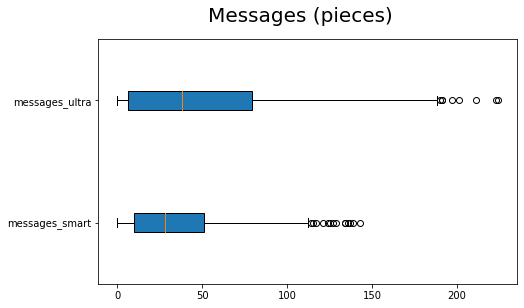

In [39]:
plt.pyplot.boxplot((df_smart['total_messages'],df_ultra['total_messages']), labels=('messages_smart', 'messages_ultra'), 
                   vert=False, patch_artist=True)
fig = plt.pyplot.gcf()
fig.set_size_inches(7.5, 4.5)
fig.suptitle('Messages (pieces)', fontsize=20)

Отбросим 0 у обоих тарифов в использовании сообщений и значения выше 110 у Smart и выше 190 у Ultra.

Let's drop 0 for both tariffs in the use of messages and values above 110 for Smart and above 190 for Ultra.

In [40]:
print('Среднее количество использованных сообщений на тарифе smart:', (df_smart.query
                                               ('total_messages > 0 and total_messages < 110')['total_messages'].mean()))
print('Медианнее количествио использованных сообщений на тарифе smart:', (df_smart.query
                                                ('total_messages > 0 and total_messages < 110')['total_messages'].median()))
print('Среднее количество использованных сообщений на тарифе ultra:', (df_ultra.query
                                                ('total_messages > 0 and total_messages < 190')['total_messages'].mean()))
print('Медианнее количество использованных сообщений на тарифе ultra:', (df_ultra.query
                                                 ('total_messages > 0 and total_messages < 190')['total_messages'].median()))
print('Стандартная ошибка количества использованных сообщений на тарифе smart:', (np.std(df_smart.query
                                                  ('total_messages > 0 and total_messages < 110')['total_messages'], ddof=1)))
print('Выборочная дисперсия количества использованных сообщений на тарифе smart:', (np.var(df_smart.query
                                                  ('total_messages > 0 and total_messages < 110')['total_messages'], ddof=1)))
print('Стандартная ошибка количества использованных сообщений на тарифе ultra:', (np.std(df_ultra.query
                                                ('total_messages > 0 and total_messages < 190')['total_messages'], ddof=1)))
print('Выборочная дисперсия количества использованных сообщений на тарифе ultra:', (np.var(df_ultra.query
                                                ('total_messages > 0 and total_messages < 190')['total_messages'], ddof=1)))

Среднее количество использованных сообщений на тарифе smart: 37.88748685594111
Медианнее количествио использованных сообщений на тарифе smart: 33.0
Среднее количество использованных сообщений на тарифе ultra: 60.126126126126124
Медианнее количество использованных сообщений на тарифе ultra: 51.0
Стандартная ошибка количества использованных сообщений на тарифе smart: 25.50262667812957
Выборочная дисперсия количества использованных сообщений на тарифе smart: 650.383967484046
Стандартная ошибка количества использованных сообщений на тарифе ultra: 43.931642654694144
Выборочная дисперсия количества использованных сообщений на тарифе ultra: 1929.989226339742


Average number of used messages on the smart tariff: 37.88748685594111

Median number of used messages on the smart plan: 33.0

Average number of messages used on the ultra plan: 60.126126126126124

Median number of messages used on the ultra plan: 51.0

Standard error of the number of used messages on the smart tariff: 25.50262667812957

Sample variance of the number of used messages on the smart tariff: 650.383967484046

Standard error of the number of used messages on the ultra tariff: 43.931642654694144

Sample variance of the number of used messages on the ultra tariff: 1929.989226339742

In [41]:
print('{: .2%} пользователей Smart превысили объем пакета сообщений'.format(len(df_smart[df_smart['over_pay_messages'] > 0]
                                              ['user_id'].unique()) / len(df_smart['user_id'].unique())))

 35.71% пользователей Smart превысили объем пакета сообщений


35.71% of Smart users have exceeded the message package

In [42]:
print('{: .2%} пользователей Ultra превысили объем пакета сообщений'.format(len(df_ultra[df_ultra['over_pay_messages'] > 0]
                                                ['user_id'].unique()) / len(df_ultra['user_id'].unique())))

 0.00% пользователей Ultra превысили объем пакета сообщений


0.00% of Ultra users have exceeded the message pack size

- В среднем абоненты Smart отправляют 37 сообщений ,а абоненты Ultra - 60.
- Получили большие значения стандартных ошибок количества отправленных сообщений в Ultra. 
- Месячные суммы отправленных сообщений на обоих тарифах не образуют нормального распределения. 
- Гистограмма количества отправленных сообщений Smart имеет отрицательную скошенность.
- 0% абонентов Ultra и 35,7% абонентов Smart превысили пакет сообщений. Это еще раз подтверждает, что тариф Ulra скорее используют из-за интрнета, чем из-за минут.
- Также очевидно, что пакета сообщений Smart не хвататает 1/3 пользователей и они вынужденны переплачивать. 

- On average, Smart subscribers send 37 messages, and Ultra subscribers - 60.
- Got large standard errors for the number of messages sent in Ultra.
- The monthly amounts of sent messages on both tariffs do not form a normal distribution.
- The histogram of the number of Smart messages sent is negatively skewed.
- 0% of Ultra subscribers and 35.7% of Smart subscribers exceeded the message package. This once again confirms that the Ulra tariff is more likely to be used because of the Internet than because of the minutes.
- It is also obvious that 1/3 of the users lack the Smart messaging package and they have to overpay.

<a id='Step_10'></a>
#### Point D.

Изучим какя услуга приносит больше всего денег от перепалат.

Let's study which service brings the most money from perepalats.

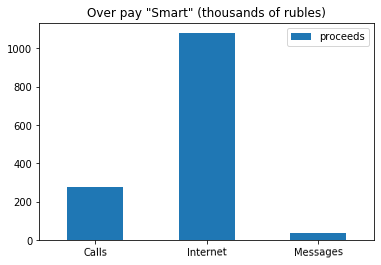

In [43]:
pd.DataFrame({'proceeds': [df_smart['over_pay_calls'].sum() / 1000, df_smart['over_pay_internet'].sum() / 1000, 
df_smart['over_pay_messages'].sum() / 1000]}, index=['Calls', 'Internet', 'Messages']).plot(kind='bar' , rot=1, 
                                                                title='Over pay "Smart" (thousands of rubles)')

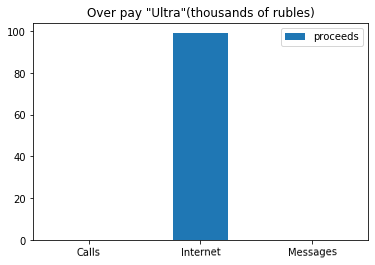

In [44]:
pd.DataFrame({'proceeds': [df_ultra['over_pay_calls'].sum() / 1000, df_ultra['over_pay_internet'].sum() / 1000, 
df_ultra['over_pay_messages'].sum() / 1000]}, index=['Calls', 'Internet', 'Messages']).plot(kind='bar' , rot=1, 
                                                                 title='Over pay "Ultra"(thousands of rubles)')

- Больше всего выручки от переплат на тарифе Smart приходит из-за переиспользования трафика.
- Больше всего выручки от переплат на тарифе Ultra приходит из-за переиспользования трафика. Еще раз напомню, что в Ultra и без того большой пакет интрнета. 

- Most of the revenue from overpayments on the Smart tariff comes from overusing traffic.
- Most of the revenue from overpayments on the Ultra tariff comes from overusing traffic. Let me remind you once again that Ultra already has a large Internet package.

<a id='Step_11'></a>
#### Пункт E.

#### Point E.

Изучим структуру доходов.

Let's study the structure of income.

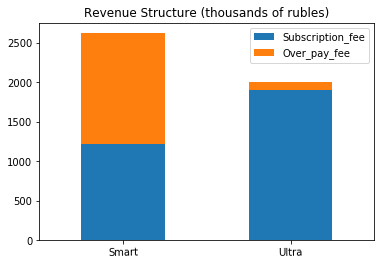

In [45]:
pd.DataFrame({'Subscription_fee' : [tariffs['rub_monthly_fee'][0] * len(df_smart) / 1000, tariffs['rub_monthly_fee'][1] 
* len(df_ultra) / 1000], 'Over_pay_fee' : [(df_smart['total_fee'].sum() - tariffs['rub_monthly_fee'][0] * 
                                len(df_smart)) / 1000, (df_ultra['total_fee'].sum() - tariffs['rub_monthly_fee'][1] 
* len(df_ultra)) / 1000]}, index=['Smart', 'Ultra']).plot(kind='bar' , 
                                                  rot=1, title='Revenue Structure (thousands of rubles)' , stacked=True)

In [46]:
print('Всего клиентов Smart', len(users[users['tariff'] == 'smart']))
print('Всего клиентов Ultra', len(users[users['tariff'] == 'ultra']))

Всего клиентов Smart 351
Всего клиентов Ultra 149


Total Smart 351 clients

Total Ultra Clients 149

- Вырчка от тарифа Smart наполовину состоит из перпеплат, в то время как на Ultra переплат почти не нет.
- Абонентов Ultra в два раза меньше чем абонентов Smart.

- Half of the revenue from the Smart tariff consists of overpayments, while there are almost no overpayments on Ultra.
- Ultra subscribers are two times less than Smart subscribers.

<a id='Step_12'></a>
#### Пункт F.

#### Point F.

Изучим динамику роста выручки.

Let's study the dynamics of revenue growth.

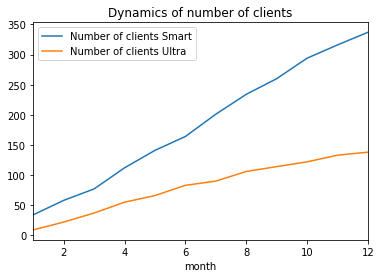

In [47]:
df_smart.groupby('month')['user_id'].count().plot(legend=True, label='Number of clients Smart', 
                                                  title='Dynamics of number of clients')
df_ultra.groupby('month')['user_id'].count().plot(legend=True, label='Number of clients Ultra')

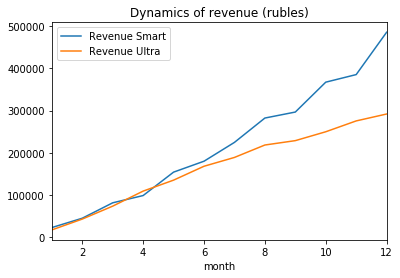

In [48]:
df_smart.groupby('month')['total_fee'].sum().plot(legend=True, label='Revenue Smart', title='Dynamics of revenue (rubles)')
df_ultra.groupby('month')['total_fee'].sum().plot(legend=True, label='Revenue Ultra')

Количество клиентов и вместе с ними объем выручки выросли больше на тарифе Smart чем на Ultra.

The number of customers and with them the amount of revenue grew more on the Smart tariff than on the Ultra one.

<a id='Step_13'></a>
#### Пункт G.

#### Point G.

Изучим отключившихся абонентов.

Let's study disconnected subscribers.

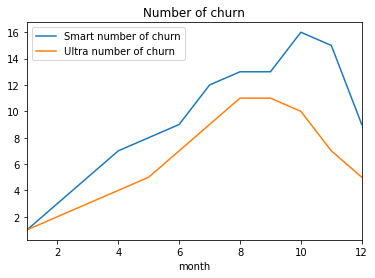

In [49]:
df_smart[df_smart['churn_date'].isna() == False].groupby('month')['user_id'].count().plot(label='Smart number of churn', 
                                                                                          title='Number of churn', legend=True)
df_ultra[df_ultra['churn_date'].isna() == False].groupby('month')['user_id'].count().plot(label='Ultra number of churn', 
                                                                                          legend=True)

In [50]:
print('{: .2%} Пользователей ушли с тарифа Smart'.format(len(users[(users['tariff'] == 'smart') & 
                (users['churn_date'].isna() == False)]) / len(users[users['tariff'] == 'smart'])))

 6.55% Пользователей ушли с тарифа Smart


6.55% of Users left the Smart plan

In [51]:
print('{: .2%} Пользователей ушли с тарифа Ultra'.format(len(users[(users['tariff'] == 'ultra') & 
                (users['churn_date'].isna() == False)]) / len(users[users['tariff'] == 'ultra'])))

 10.07% Пользователей ушли с тарифа Ultra


10.07% of Users have left the Ultra plan

In [52]:
print('{: .2%} ушедших с тарифа Smart переплачивали сверх абонентской платы'.format(
len(df_smart[(df_smart['churn_date'].isna() == False) & (df_smart['total_fee'] > tariffs['rub_monthly_fee'][0])]
    ['user_id'].unique()) / len(df_smart[df_smart['churn_date'].isna() == False]['user_id'].unique())))

 68.18% ушедших с тарифа Smart переплачивали сверх абонентской платы


68.18% of those who left the Smart tariff overpaid in excess of the monthly fee

In [53]:
print('{: .2%} ушедших с тарифа Smart переплачивали сверх абонентской платы тарифа Ultra'.format(
len(df_smart[(df_smart['churn_date'].isna() == False) & (df_smart['total_fee'] > 
tariffs['rub_monthly_fee'][1])]['user_id'].unique()) / len(df_smart[df_smart['churn_date'].isna() == False]
                                                           ['user_id'].unique())))
    

 22.73% ушедших с тарифа Smart переплачивали сверх абонентской платы тарифа Ultra


22.73% of those who left the Smart tariff overpaid in excess of the subscription fee of the Ultra tariff

In [54]:
print('{: .2%} ушедших с тарифа Ultra переплачивали сверх абонентской платы'.format(
len(df_ultra[(df_ultra['churn_date'].isna() == False) & (df_ultra['total_fee'] > 
tariffs['rub_monthly_fee'][1])]['user_id'].unique()) / len(df_ultra[df_ultra['churn_date'].isna() == False]
                                                           ['user_id'].unique())))

 21.43% ушедших с тарифа Ultra переплачивали сверх абонентской платы


21.43% of those who left the Ultra plan overpaid on top of the subscription fee

In [55]:
print('{: .2%} ушедших абонентов Ultra могли бы огрничиться тарифом Smart'.format(
(len(df_ultra[(df_ultra['churn_date'].isna() == False) & (df_ultra['total_calls'] < tariffs['minutes_included'][0]) 
              & (df_ultra['total_internet'] < tariffs['mb_per_month_included'][0]) & (df_ultra['total_messages'] 
                    < tariffs['messages_included'][0])]['user_id'].unique()) / len(df_ultra[df_ultra['churn_date'].isna() == False]
                                                                                   ['user_id'].unique()))))

 92.86% ушедших абонентов Ultra могли бы огрничиться тарифом Smart


92.86% of Ultra subscribers who left could be limited to Smart tariff

- c тарифа Smart ушло 6,5% абонентов, а с Ultra 10%.
- с начала года количество ушедших абонентов росло, но на 8 и 10 месяцах, у Smart и Ultra соответсвенно, рост сменился падением, которое продолжалось до конца года.
- 68% ушедших абонентов Smart переплачивали
- 22,7 % из них платили больше чем абонентская плата тарифа Ultra
- ушедшие абоненты тарифа Ultra  переплачивали в 21,4% случаев
- 93% ушедших абонентов Ultra обошлись бы тарифом Smart 

- 6.5% of subscribers left the Smart tariff, and 10% from Ultra.
- since the beginning of the year, the number of lost subscribers has been growing, but at 8 and 10 months, for Smart and Ultra, respectively, the growth was replaced by a fall, which continued until the end of the year.
- 68% of the departed Smart subscribers overpaid
- 22.7% of them paid more than the subscription fee of the Ultra tariff
- departed Ultra tariff subscribers overpaid in 21.4% of cases
- 93% of Ultra subscribers who left would get by with Smart tariff

Кажется, оператору стоит прозвонить абонентов и предложить им перейти на более подходящий тариф.

It seems that the operator should call subscribers and offer them to switch to a more suitable tariff.

#### Вывод:
- использование пакета тарифа Ultra не имеет нормального распределения по всем трем услугам (связь, интрнет, сообщения)
- тариф Smart используют больше абонентов и это приносит больший доход в абсолютных значенях, но меньшую доходность за счет своей цены
- пакета Smart часто не хватает абонентам для использования, а тарифа Ultra оказывается слишком много
- наблюдений по отключившимся абонентам слишком мало, но все таки, кажется, что причиной ухода абонентов с тарифа Smart служат постоянные переплаты
- также можно предположить, что тариф Ultra по большей части используется из-за интрнета
- абоненты из выборки Ultra не выговорили свой пакет минут, но часто переиспользовали пакет трафика и редко пакет сообщений

#### Conclusion:
- the use of the Ultra tariff package does not have a normal distribution for all three services (communication, internet, messages)
- Smart tariff is used by more subscribers and it brings more income in absolute terms, but less profitability due to its price
- the Smart package is often not enough for subscribers to use, and the Ultra tariff is too much
- there are too few observations on disconnected subscribers, but still, it seems that the reason for subscribers leaving the Smart tariff is constant overpayments
- it can also be assumed that the Ultra tariff is mostly used because of the Internet
- subscribers from the Ultra sample did not pronounce their minutes package, but often reused the traffic package and rarely the message package

Предположу, что услуги мобильных операторов активно используются абонентами. Тариф Smart часто при этом не способен дать им достатоный объем предоплаченных услуг. Это заставляет абонентов переплачивать. Переплата вызвает негативные эмоции, а это влечет за собой отказ от потребления услуг у данного оператора. Также тарифа Ultra зачатсую избыточно много.

I will assume that the services of mobile operators are actively used by subscribers. The Smart tariff is often not able to provide them with a sufficient volume of prepaid services. This forces subscribers to overpay. Overpayment causes negative emotions, and this entails a refusal to use services from this operator. Also, the Ultra tariff will conceive too much.

<a id='Step_14'></a>
## 7. Статистическое исследование.

## 7. Statistical research.

<div class="alert alert-info">Требуется ответить на два вопроса: какой тариф приносит в среднем больше денег и равна ли средняя выручка в Москве средней выручке в других городах. Для этого будем использовать двусторонний t-тест, так как неравнество средних может означать как положительное так и отрицательное отклонение.</div>

<div class="alert alert-info">Two questions need to be answered: which tariff brings more money on average and whether the average revenue in Moscow is equal to the average revenue in other cities. For this, we will use a two-tailed t-test, since the inequality of means can mean both positive and negative deviation.</div>

<a id='Step_15'></a>
#### Пункт A. 
Исследуем на доходы от тарифов. 

#### Point A.
We investigate on income from tariffs.

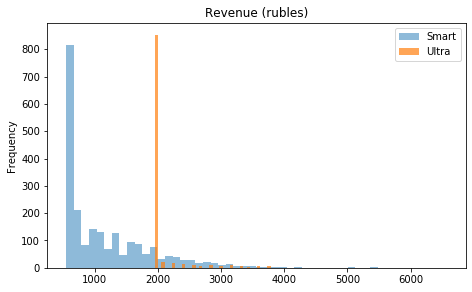

In [56]:
df_smart['total_fee'].plot(kind='hist', bins=50, alpha = 0.5, legend=True, 
                                title='Revenue (rubles)', figsize=(7.5, 4.5), label='Smart')
df_ultra['total_fee'].plot(kind='hist', bins=50, alpha = 0.7, legend=True, label='Ultra')

Text(0.5, 0.98, 'Revenue (rubles)')

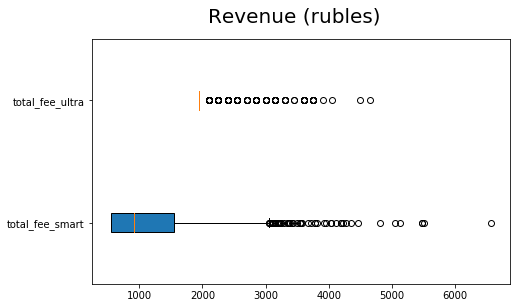

In [57]:
plt.pyplot.boxplot((df_smart['total_fee'],df_ultra['total_fee']), labels=('total_fee_smart', 'total_fee_ultra'), vert=False,
                  patch_artist=True)
fig = plt.pyplot.gcf()
fig.set_size_inches(7.5, 4.5)
fig.suptitle('Revenue (rubles)', fontsize=20)

Очевидно, что средние доходов у тарифов разные. Значима ли разница?

It is obvious that the average incomes of the tariffs are different. Is the difference significant?

- H0 - оба тарифа приносят одинаковый доход в среднем
- H1 - средние доходов двух тарифов отличаются

- H0 - both tariffs bring the same income on average
- H1 - the average incomes of the two tariffs are different

In [58]:
print('Shapiro-Wilk test для Smart', st.shapiro(df_smart['total_fee']))
print('Shapiro-Wilk test для Ultra', st.shapiro(df_ultra['total_fee']))
print('Levene test' ,st.levene(df_smart['total_fee'], df_ultra['total_fee']))
print('Количество наблюдений Smart', len(df_smart))
print('Количество наблюдений Ultra', len(df_ultra))

Shapiro-Wilk test для Smart (0.8052712678909302, 1.401298464324817e-45)
Shapiro-Wilk test для Ultra (0.34007740020751953, 0.0)
Levene test LeveneResult(statistic=532.3833845968306, pvalue=4.27480746542348e-109)
Количество наблюдений Smart 2228
Количество наблюдений Ultra 975


Shapiro-Wilk test for Smart (0.8052712678909302, 1.401298464324817e-45)

Shapiro-Wilk test for Ultra (0.34007740020751953, 0.0)

Levene test LeveneResult(statistic=532.3833845968306, pvalue=4.27480746542348e-109)

Number of Smart 2228 observations

Number of Ultra 975 observations

Получили маленькое p-значение теста Левина - дисперсия слишком сильно отличается у двух выборок. Учтем это в тесте.

We got a small p-value of the Levin test - the variance is too different for the two samples. Let's take this into account in the test.

In [59]:
alpha = .05
results = st.ttest_ind(df_smart['total_fee'],df_ultra['total_fee'], equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


p-value: 0.0
Rejecting the null hypothesis

#### Нулевая гипотеза отвергнута. Исходя из средних, "Ultra" приносит в целом больше денег чем "Smart".

#### Null hypothesis rejected. Based on averages, "Ultra" makes more money overall than "Smart".

<a id='Step_16'></a>
#### Пункт B. 

#### Point B. 

Проверим гипотезу о равенстве выручки в Москве и других регионах.

Let's test the hypothesis about the equality of revenue in Moscow and other regions.

In [60]:
# Получим выборки по городам: Москва и не Москва.
Moscow = pd.concat([df_smart[df_smart['city'] == 'Москва'], df_ultra[df_ultra['city'] == 'Москва']], ignore_index=True)
Non_Moscow = pd.concat([df_smart[df_smart['city'] != 'Москва'], df_ultra[df_ultra['city'] != 'Москва']], ignore_index=True)

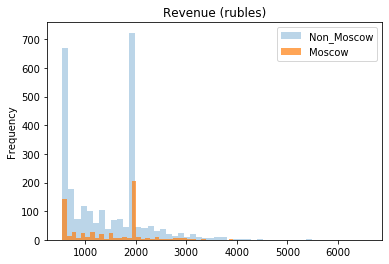

In [61]:
Non_Moscow['total_fee'].plot(kind='hist', bins=50, alpha = 0.3, legend=True, label='Non_Moscow')
Moscow['total_fee'].plot(kind='hist', bins=50, alpha = 0.7, legend=True, label='Moscow', title='Revenue (rubles)')

Text(0.5, 0.98, 'Revenue (rubles)')

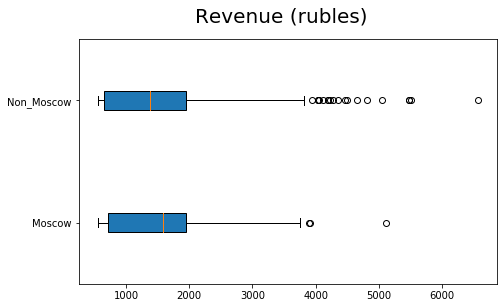

In [62]:
plt.pyplot.boxplot((Moscow['total_fee'], Non_Moscow['total_fee']), labels=('Moscow', 'Non_Moscow'), vert=False,
                  patch_artist=True)
fig = plt.pyplot.gcf()
fig.set_size_inches(7.5, 4.5)
fig.suptitle('Revenue (rubles)', fontsize=20)

- H0 - В Москве и в регионах тарифы приносят одинковый доход в среднем
- H1 - средний доход в Москве отличается от среднего дохода в других городах

- H0 - In Moscow and in the regions, tariffs bring the same income on average
- H1 - the average income in Moscow differs from the average income in other cities

In [63]:
print('Levene test' ,st.levene(Moscow['total_fee'], Non_Moscow['total_fee']))

Levene test LeveneResult(statistic=4.692407757516543, pvalue=0.030369748278879522)


P-значение теста Левина слишком маленькое - дисперсии  выборок разные. Учтем это в t-тесте.

The p-value of Levin's test is too small - the sample variances are different. Let's take this into account in the t-test.

In [64]:
alpha = .05
results = st.ttest_ind(Moscow['total_fee'], Non_Moscow['total_fee'], equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3283576305684036
Не получилось отвергнуть нулевую гипотезу


p-value: 0.3283576305684036
Failed to reject the null hypothesis

#### Нулевая гипотеза не отвергнута. Средняя выручка в Москве и регионах значительно не отличается (с высокой веротяностью). 

#### Null hypothesis not rejected. The average revenue in Moscow and the regions does not differ significantly (with high probability).

#### Вывод:
- средняя выручка от тарифа Ultra выше чем средняя выручка от тарифа Smart (с высокой веротяностью)
- средняя выручка в Москве примерно равна средней выручке в регионах (с высокой веротяностью)

#### Conclusion:
- the average revenue from the Ultra tariff is higher than the average revenue from the Smart tariff (with high probability)
- average revenue in Moscow is approximately equal to the average revenue in the regions (with high probability)

<a id='Step_17'></a>
## Пункт 8. Вывод.

## Item 8. Conclusion.

1. Данные были подготовлены и объединены. Необходимые показатели рассчитаны.
2. На основе анализа поведения клииентов делаем выводы:
- Тариф Smart не предоставляет достаточный объем пакетов. Половина абонентов вынуждены переплачивать.
- Тариф Ultra предсотавляет пакет минут больший, чем кто либо из данной выборки смог израсходывать. Интрнет перерасходуют 26% пользоватедей. Отметим, что трафика и сообщений в этом тарифе много, 30 гб и 1000шт, соответсвенно. Абоненты Ultra - активные пользователи современных форм коммуникации - интернет и текстовые сообщения.
- Выручка от тарифа Smart на 50% состоит из переплат. Больше всего переплат за интрнет - 1 млн.р. и минуты - 290 т.р.
- Выручка от тарифа Ultra главным образом состоит из абонентсокй платы ~ 90%. Переплаты происходят за счет перерасхода трафика (100 т.р.).
- Количетсво абонентов на тарифе Smart росло быстрее чем на Ultra и вместе с этим росла и выручка.
- Возможно абонеты уходят с тарифа Smart из-за постонняых переплат. 22,5% платили даже больше, чем платили бы на Ultra.
- В целом выручка по выборке больше у Smart 2,6 млн.р. против 2 млн.р. у Ultra.
- Траты абонентов на связь и интрнет на тарифе Smart хорошо описываются нормальным распределением, сообщения не распределны нормально. В то время как всё выше перечисленное не описывается нормальным распределением у Ultra. Это говорит о значительной неоднордности поведения абонентов этого тарифа.
3. На основе статистического исследования:
- Отвергнута гипотеза о равенстве средней выручки тарифов Smart и Ultra и на основе превосходства средней выручки тарифа Ultra был сделан вывод, что средняя выручка от тарифа Ultra выше, чем от тарифа Smart.
- Не была отвергнута гипотеза о равенстве выручки от использования обоих тарифов в Москве и других регионах. То есть, с высокой вероятностью, средняя выручка в Москве примерно равна средней выручке в других регионах.
4. Подводя итог, можно дать рекомендацию коммерческому департаменту. Ресурсы реклманной компании должны быть перераспределены в сторону больших затрат на продвижение тарифа Ultra во всех регионах странны, так как этот тариф лучше отвечает потребностям пользователей и приносит большую среднюю выручку. Кроме того, абоненты меньше уходят с этого тарифа.

1. Data has been prepared and pooled. The required indicators are calculated.
2. Based on the analysis of customer behavior, we draw conclusions:
- The Smart tariff does not provide a sufficient volume of packages. Half of the subscribers are forced to overpay.
- The Ultra tariff provides a package of minutes more than anyone from this selection could spend. Internet is overused by 26% of users. Note that there is a lot of traffic and messages in this tariff, 30 GB and 1000 pieces, respectively. Ultra subscribers are active users of modern forms of communication - Internet and text messages.
- The proceeds from the Smart tariff for 50% consists of overpayments. Most overpayments for the Internet - 1 million rubles. and minutes - 290 tr.
- Revenue from the Ultra tariff mainly consists of ~ 90% subscription fee. Overpayments occur due to traffic overruns (100 tr.).
- The number of subscribers on the Smart tariff grew faster than on Ultra, and revenue grew along with it.
- Perhaps subscribers leave the Smart tariff due to constant overpayments. 22.5% paid even more than they would have paid on Ultra.
- In general, Smart's revenue for the sample is more than 2.6 million rubles. against 2 million rubles at Ultra.
- The expenses of subscribers for communication and Internet on the Smart tariff are well described by the normal distribution, messages are not distributed normally. While all of the above is not described by the normal distribution of Ultra. This indicates a significant heterogeneity in the behavior of subscribers of this tariff.
3. Based on a statistical study:
- The hypothesis about the equality of the average revenue of the Smart and Ultra tariffs was rejected and, based on the superiority of the average revenue of the Ultra tariff, it was concluded that the average revenue from the Ultra tariff is higher than from the Smart tariff.
- The hypothesis about the equality of revenue from the use of both tariffs in Moscow and other regions was not rejected. That is, with a high probability, the average revenue in Moscow is approximately equal to the average revenue in other regions.
4. Summing up, we can give a recommendation to the commercial department. The resources of the advertising company should be reallocated towards higher costs for the promotion of the Ultra tariff in all regions is strange, since this tariff better meets the needs of users and brings a larger average revenue. In addition, subscribers leave this tariff less.